# Задача 4.2

In [4]:
import numpy as np
import math as mth
import scipy.stats as sps
import matplotlib.pyplot as plt
from __future__ import division

N = 1000
m = 50
a = 3
sgm = 2.1
%pylab inline
grid = np.arange(1, N+1)

Populating the interactive namespace from numpy and matplotlib


Для начала, посчитаю оставшиеся параметры

In [27]:
#биномиальное - с = 1/0.0137567
class bin1_gen(sps.rv_continuous):
    def _pdf(self, x):
        return x**5/0.0137567
bin1 = bin1_gen(a=0.22, b=0.66, name='bin1')
p = bin1.rvs()

#нормальное с неизв матож
a1 = sps.uniform.rvs(loc=-65, scale=45)

#нормальное и неизв дисп - с = 1/0.067184
class norm1_gen(sps.rv_continuous):
    def _pdf(self, x):
        return x**3/0.067184
norm1 = norm1_gen(a=0.015, b=0.72, name='norm1')
sgm1 = norm1.rvs()

#про эксп ничего нет, поэтому
theta = 1

## Bin(m, p), m известно 

In [17]:
sample = sps.binom.rvs(m, p, size=N)
def bin_fisher(n):
    return (p*(1-p))/(m*n)

#### Вычисление оценок 

In [21]:
bineffect = list() # эффективные оценки
binother = list()
bineffbv = list()  #бутстрепные оц дисп 
binothbv = list()
for n in grid:
    #эффективная оценка
    y = sample[:n].mean()/m
    bineffect.append(y)
    bootevalef = list() #бутстр эфф оценки
    
    #другая оценка
    z = min(sample[:n])/m
    binother.append(z)
    bootevalot = list()
    
    for i in range(500):
        sample1 = sps.binom.rvs(m, y,size = n)
        bootevalef.append(sample1.mean()/m)
        
        sample2 = sps.binom.rvs(m, z,size = n)
        bootevalot.append(min(sample2)/m)
    
    bineffbv.append(np.var(bootevalef))
    binothbv.append(np.var(bootevalot))

#### Построение графиков

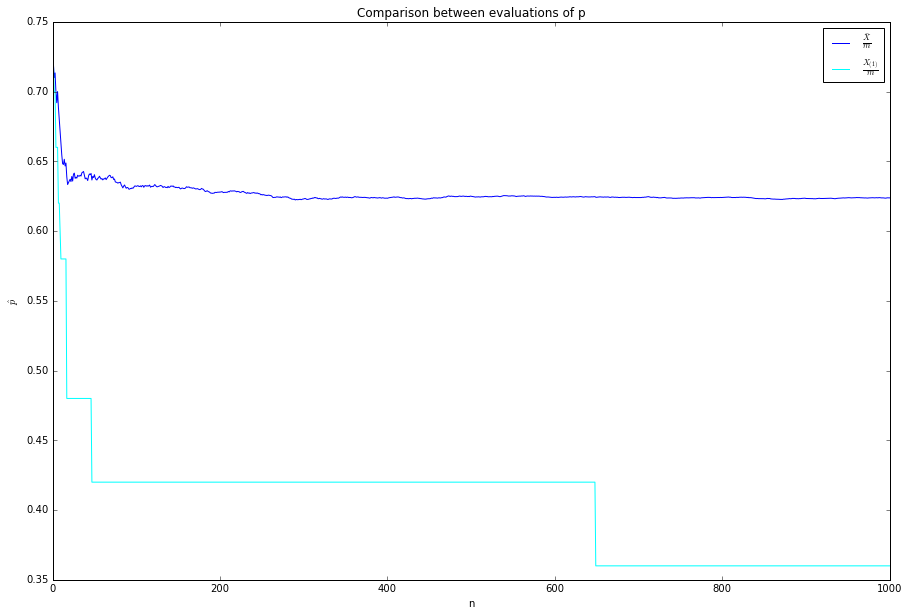

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(grid, bineffect, color='blue', linewidth=1, label=r'$\frac{\bar{X}}{m}$')
plt.plot(grid, binother, color='cyan', linewidth=1, label=r'$\frac{X_{(1)}}{m}$')
plt.title(r'Comparison between evaluations of p')
plt.legend()
plt.xlabel(r'n')
plt.ylabel(r'$\hat{p}$')
plt.show()

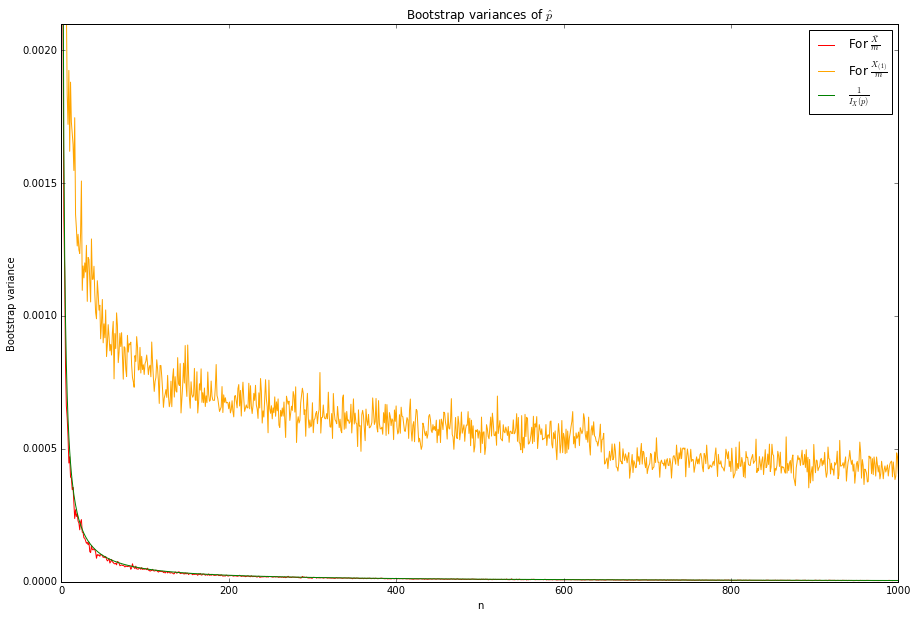

In [86]:
plt.figure(figsize=(15, 10))
plt.plot(grid, bineffbv, color='red', linewidth=1, label=r'For $\frac{\bar{X}}{m}$')
plt.plot(grid, binothbv, color='orange', linewidth=1, label=r'For $\frac{X_{(1)}}{m}$')
plt.plot(grid, bin_fisher(grid), color='green', linewidth=1, label=r'$\frac{1}{I_X(p)}$')
plt.title(r'Bootstrap variances of $\hat{p}$')
plt.legend()
plt.ylim((0, 0.0021))
plt.xlabel(r'n')
plt.ylabel('Bootstrap variance')
plt.show()

## Norm(a, $\sigma^2$), $\sigma$ известно 

In [39]:
sample = sps.norm.rvs(loc=a1, scale=sgm, size=N)
def norm_fisher(n):
    return sgm**2/n

#### Вычисление оценок

In [33]:
normeffect = list() # эффективные оценки
normother = list()
normeffbv = list()  #бутстрепные оц дисп 
normothbv = list()
for n in grid:
    #эффективная оценка
    y = sample[:n].mean()
    normeffect.append(y)
    bootevalef = list() #бутстр эфф оценки
    
    #другая оценка
    z = median(sample[:n])
    normother.append(z)
    bootevalot = list()
    
    for i in range(500):
        sample1 = sps.norm.rvs(loc=y, scale=sgm,size = n)
        bootevalef.append(sample1.mean())
        
        sample2 = sps.norm.rvs(loc=z, scale=sgm, size = n)
        bootevalot.append(median(sample2))
    
    normeffbv.append(np.var(bootevalef))
    normothbv.append(np.var(bootevalot))

#### Построение графиков

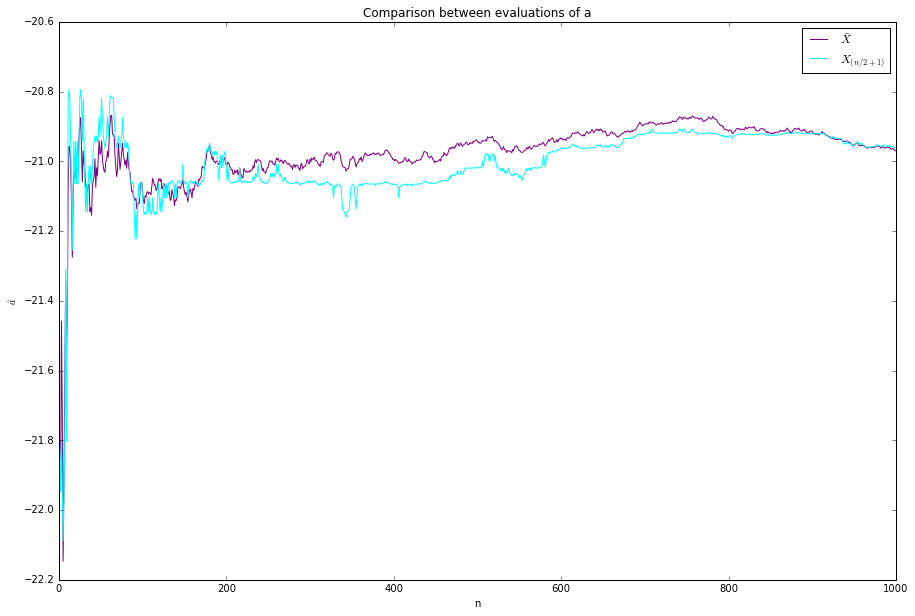

In [34]:
plt.figure(figsize=(15, 10))
plt.plot(grid, normeffect, color='purple', linewidth=1, label=r'$\bar{X}$')
plt.plot(grid, normother, color='cyan', linewidth=1, label=r'$X_{(n/2+1)}$')
plt.title(r'Comparison between evaluations of a')
plt.legend()
plt.xlabel(r'n')
plt.ylabel(r'$\hat{a}$')
plt.show()

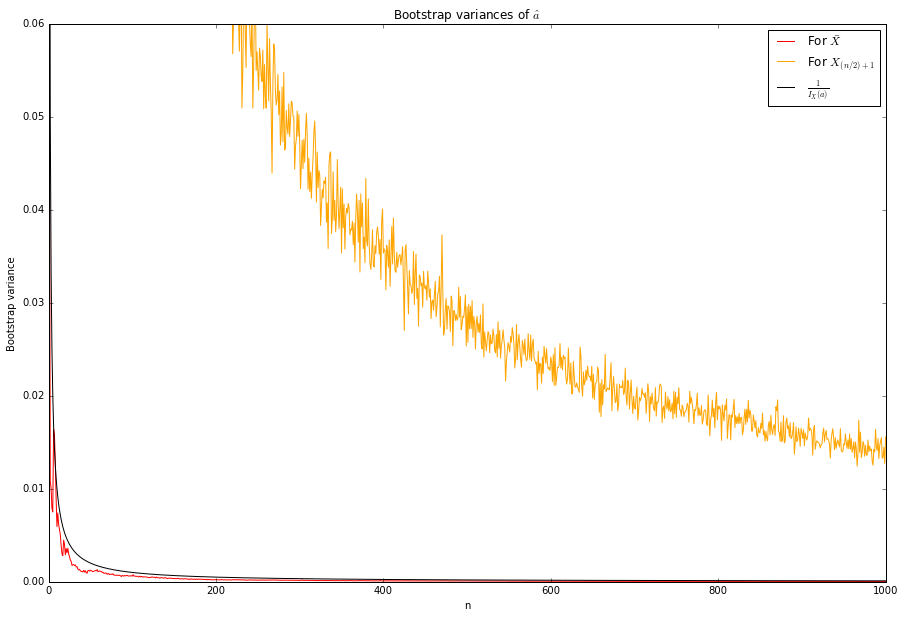

In [87]:
plt.figure(figsize=(15, 10))
plt.plot(grid, normeffbv, color='red', linewidth=1, label=r'For $\bar{X}$')
plt.plot(grid, normothbv, color='orange', linewidth=1, label=r'For $X_{(n/2)+1}$')
plt.plot(grid, norm_fisher(grid), color='black', linewidth=1, label=r'$\frac{1}{I_X(a)}$')
plt.title(r'Bootstrap variances of $\hat{a}$')
plt.legend()
plt.ylim((0, 0.06))
plt.xlabel(r'n')
plt.ylabel('Bootstrap variance')
plt.show()

## Norm(a, $\sigma^2$), a известно 

In [81]:
sample = sps.norm.rvs(loc=a, scale=sgm1, size=N)
def norm_fisher(n):
    return sgm1**2/(2*n)

#### Вычисление оценок

In [78]:
normeffect = list() # эффективные оценки
normeffbv = list()  #бутстрепные оц дисп 
for n in grid:
    #эффективная оценка
    y = sum([(sample[i]-a)**2 for i in range(n)])/n
    normeffect.append(y)
    bootevalef = list() #бутстр эфф оценки
    
    #другой оценки нет
    
    for i in range(500):
        sample1 = sps.norm.rvs(loc=a, scale=y,size = n)
        bootevalef.append(sum([(sample1[i]-a)**2 for i in range(n)])/n)
        
    normeffbv.append(np.var(bootevalef))

#### Построение графиков

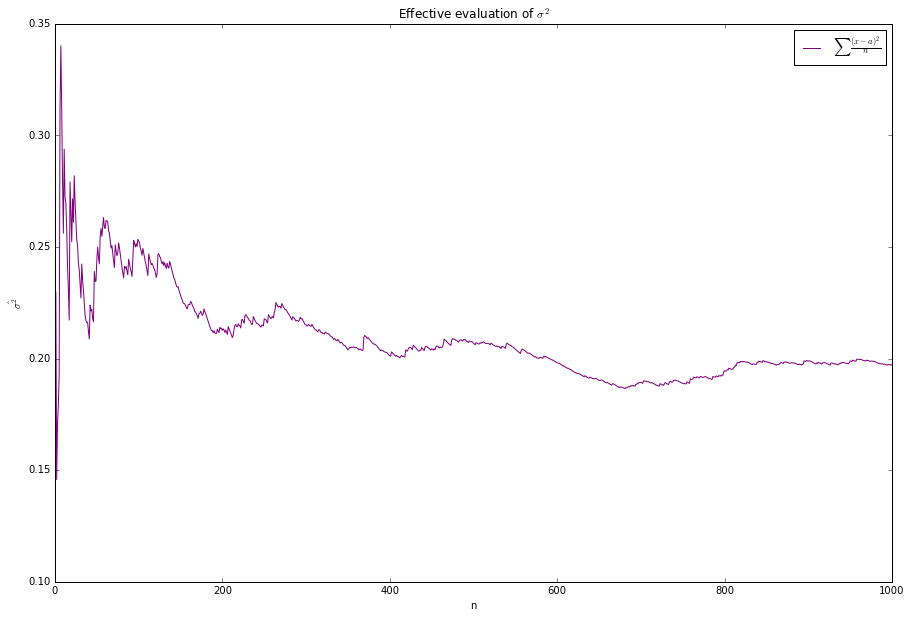

In [79]:
plt.figure(figsize=(15, 10))
plt.plot(grid, normeffect, color='purple', linewidth=1, label=r'$\sum\frac{(x-a)^2}{n}$')
plt.title(r'Effective evaluation of $\sigma^2$')
plt.legend()
plt.xlabel(r'n')
plt.ylabel(r'$\hat{\sigma^2}$')
plt.show()

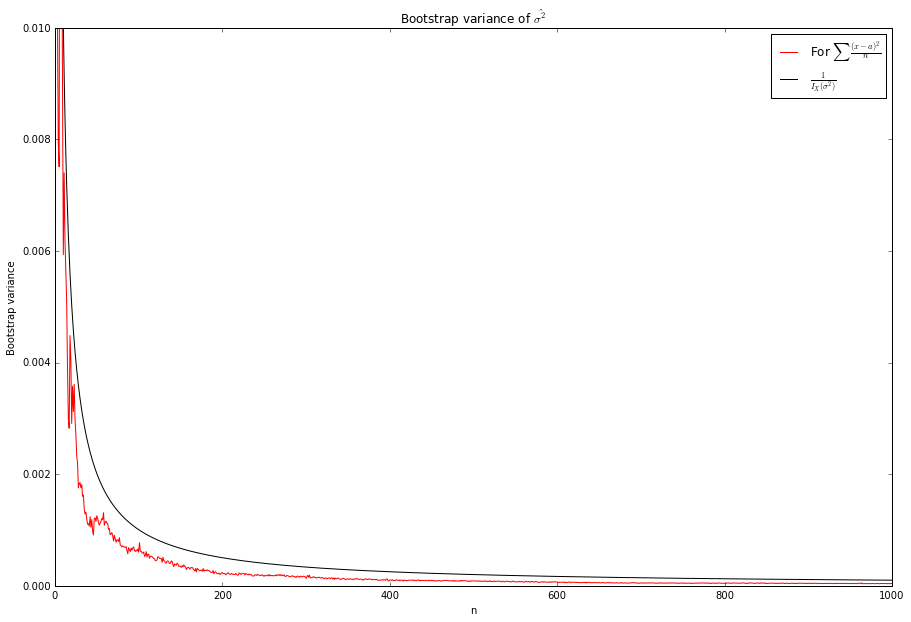

In [90]:
plt.figure(figsize=(15, 10))
plt.plot(grid, normeffbv, color='red', linewidth=1, label=r'For $\sum\frac{(x-a)^2}{n}$')
plt.plot(grid, norm_fisher(grid), color='black', linewidth=1, label=r'$\frac{1}{I_X(\sigma^2)}$')
plt.title(r'Bootstrap variance of $\hat{\sigma^2}$')
plt.legend()
plt.ylim((0, 0.01))
plt.xlabel(r'n')
plt.ylabel('Bootstrap variance')
plt.show()

## Exp($\theta$) 

In [84]:
sample = sps.expon.rvs(scale=theta, size=N)
def exp_fisher(n):
    return theta**2/(2*n)

#### Вычисление оценок

In [85]:
expeffect = list() # эффективные оценки
expother = list()
expeffbv = list()  #бутстрепные оц дисп 
expothbv = list()
for n in grid:
    #эффективная оценка
    y = 1/sample[:n].mean()
    expeffect.append(y)
    bootevalef = list() #бутстр эфф оценки
    
    #другая оценка
    z = 1/(2*sample[:n].mean()) + n/(2*min(sample[:n]))
    expother.append(z)
    bootevalot = list()
    
    for i in range(500):
        sample1 = sps.expon.rvs(scale=y, size = n)
        bootevalef.append(1/sample1.mean())
        
        sample2 = sps.expon.rvs(scale=z, size = n)
        bootevalot.append(1/(2*sample2[:n].mean()) + n/(2*min(sample2[:n])))
    
    expeffbv.append(np.var(bootevalef))
    expothbv.append(np.var(bootevalot))

#### Построение графиков

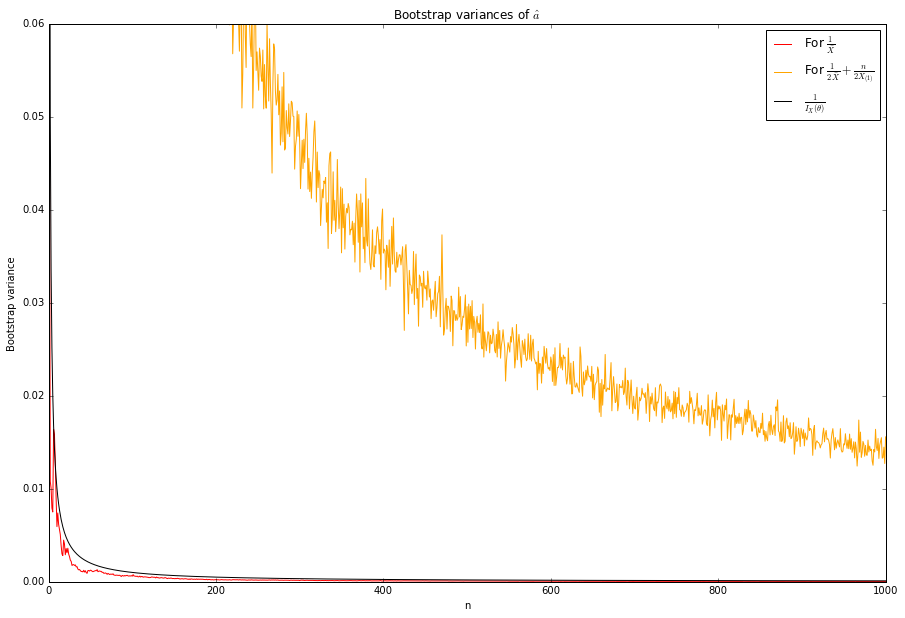

In [89]:
plt.figure(figsize=(15, 10))
plt.plot(grid, normeffbv, color='red', linewidth=1, label=r'For $\frac{1}{\bar{X}}$')
plt.plot(grid, normothbv, color='orange', linewidth=1, label=r'For $\frac{1}{2\bar{X}}+\frac{n}{2X_{(1)}}$')
plt.plot(grid, norm_fisher(grid), color='black', linewidth=1, label=r'$\frac{1}{I_X(\theta)}$')
plt.title(r'Bootstrap variances of $\hat{a}$')
plt.legend()
plt.ylim((0, 0.06))
plt.xlabel(r'n')
plt.ylabel('Bootstrap variance')
plt.show()